In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

In [2]:
creditData = pd.read_csv("credit.csv")
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
creditData.shape

(1000, 17)

In [4]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
creditData.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

Converting all object types columns into categorial types 

In [6]:
# for feature in creditData.columns:
#     if creditData[feature].dtypes == 'object':
#         creditData[feature] = creditData[feature].astype("category")
# creditData.head(10)

In [7]:
creditData.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [8]:
creditData.isna().any()

checking_balance        False
months_loan_duration    False
credit_history          False
purpose                 False
amount                  False
savings_balance         False
employment_duration     False
percent_of_income       False
years_at_residence      False
age                     False
other_credit            False
housing                 False
existing_loans_count    False
job                     False
dependents              False
phone                   False
default                 False
dtype: bool

In [9]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [10]:
replacestruct = {
    "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
}

oneHotCols=["purpose","housing","other_credit","job"]

In [11]:
creditData = creditData.replace(replacestruct)
creditData = pd.get_dummies(creditData , columns = oneHotCols)
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [12]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [13]:
x = creditData.drop('default' , axis =1)
y = creditData['default']

x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 1 , test_size = 0.3)

criterion can be 'gini' or 'entropy'

In [14]:
dtree = DecisionTreeClassifier(criterion = 'gini' , random_state = 1)
dtree.fit(x_train , y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
print(dtree.score(x_train , y_train))
print(dtree.score(x_test , y_test))

1.0
0.6933333333333334


# Visualizing the Decision Tree

Works only if "dot" command works on you machine

pip install graphviz

In [16]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [17]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


# Prunning : Reducing over fitting(Regularization)

Bascially prunnning is cutting extra branches oif decision tree.

Here, we are resticting the D Tree to depth of 3 and removing the rest all.

In [18]:
dtreeR = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , random_state = 1)
dtreeR.fit(x_train , y_train)
print(dtreeR.score(x_train , y_train))
print(dtreeR.score(x_test , y_test))

0.7528571428571429
0.7433333333333333


In [19]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtreeR, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [20]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [21]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtreeR.feature_importances_ , columns = ['Importance'] , index = x_train.columns))

                              Importance
checking_balance                0.492510
months_loan_duration            0.169806
credit_history                  0.166109
amount                          0.000000
savings_balance                 0.064467
employment_duration             0.000000
percent_of_income               0.000000
years_at_residence              0.000000
age                             0.000000
existing_loans_count            0.000000
dependents                      0.000000
phone                           0.000000
purpose_business                0.051129
purpose_car                     0.000000
purpose_car0                    0.000000
purpose_education               0.000000
purpose_furniture/appliances    0.000000
purpose_renovations             0.000000
housing_other                   0.000000
housing_own                     0.000000
housing_rent                    0.000000
other_credit_bank               0.000000
other_credit_none               0.055977
other_credit_sto

0.7433333333333333


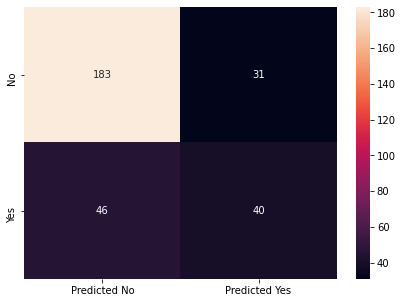

In [22]:
print(dtreeR.score(x_test , y_test))
y_predict = dtreeR.predict(x_test)

cm = metrics.confusion_matrix(y_test , y_predict , labels = [0,1])

df_cm = pd.DataFrame(cm , index = [i for i in ['No' , 'Yes']],
                    columns = [ i for i in ['Predicted No' , 'Predicted Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True , fmt = 'g')

# Ensemble Learning - Bagging

Use the more complex model to get more accurate score

In [23]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator = dtree , n_estimators = 50 , random_state = 1)
bgcl = bgcl.fit(x_train , y_train)

0.7733333333333333


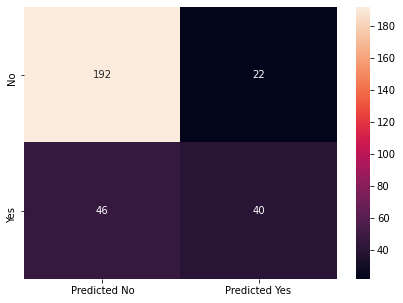

In [24]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))

cm = metrics.confusion_matrix(y_test , y_predict , labels = [0,1])

df_cm = pd.DataFrame(cm , index = [i for i in ['No' , 'Yes']],
                    columns = [i for i in ['Predicted No' , 'Predicted Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True , fmt = 'g')

# Ensemble Learning - AD BOOST

Dont use complex model , use simple model as possible

In [25]:
from sklearn.ensemble import AdaBoostClassifier
# abcl = AdaBoostClassifier(base_estimator = dtree , n_estimators = 50 , random_state = 1)
abcl = AdaBoostClassifier(n_estimators = 10 , random_state = 1)
abcl = abcl.fit(x_train,y_train)

0.74


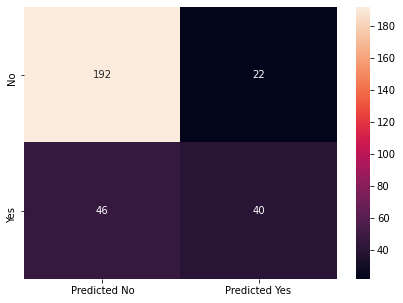

In [26]:
y_predict = bgcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm = metrics.confusion_matrix(y_test , y_predict , labels = [0,1])

df_cm = pd.DataFrame(cm , index = [i for i in ['No' , 'Yes']],
                    columns = [i for i in ['Predicted No' , 'Predicted Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True , fmt = 'g')

# Ensemble Learning - GRADIENTBOOST

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50 , random_state = 1)
gbcl = gbcl.fit(x_train , y_train)

0.74


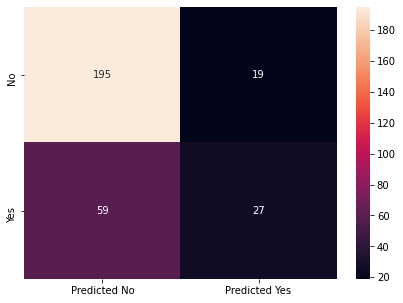

In [28]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test , y_test))

cm = metrics.confusion_matrix(y_test , y_predict , labels = [0,1])

df_cm = pd.DataFrame(cm , index = [i for i in ['No' , 'Yes']],
                    columns = [i for i in ['Predicted No' , 'Predicted Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True , fmt = 'g')

# Ensemble Learning - XGBoost

It is an extension of the Gradient Boost technique.

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7433333333333333


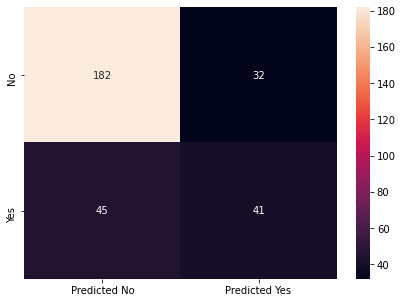

In [30]:
y_predict = xgb.predict(x_test)
print(xgb.score(x_test , y_test))

cm = metrics.confusion_matrix(y_test , y_predict , labels = [0,1])

df_cm = pd.DataFrame(cm , index = [i for i in ['No' , 'Yes']],
                    columns = [i for i in ['Predicted No' , 'Predicted Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True , fmt = 'g')

# Ensemble RandomForest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50 , random_state =1 , max_features = 12)
rfcl = rfcl.fit(x_train,y_train)

0.7766666666666666


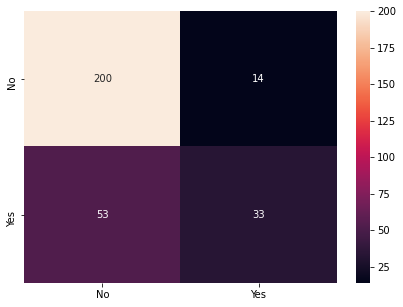

In [32]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')